# Jonathan Halverson
# Saturday, April 30, 2016
# Spark and IPython

In [135]:
lines = sc.textFile('text_file.md', use_unicode=False)

In [136]:
lines.take(5)

['# Apache Spark',
 '',
 'Spark is a fast and general cluster computing system for Big Data. It provides',
 'high-level APIs in Scala, Java, Python, and R, and an optimized engine that',
 'supports general computation graphs for data analysis. It also supports a']

In [137]:
py_lines = lines.filter(lambda line: 'Python' in line and 'Java' not in line)
jv_lines = lines.filter(lambda line: 'Java' in line and 'Python' not in line)
print py_lines.union(jv_lines).count(), lines.filter(lambda line: 'Python' in line or 'Java' in line).count()

2 3


### Using RDDs in a Python object

In [138]:
class ScalaFinder(object):
    def __init__(self, keyword):
        self.keyword = keyword
    def printLines(self, RDD):
        for line in RDD.collect():
            if (self.keyword in line):
                print line

In [139]:
sf = ScalaFinder('and')
sf.printLines(lines)

Spark is a fast and general cluster computing system for Big Data. It provides
high-level APIs in Scala, Java, Python, and R, and an optimized engine that
rich set of higher-level tools including Spark SQL for SQL and DataFrames,
and Spark Streaming for stream processing.
and [project wiki](https://cwiki.apache.org/confluence/display/SPARK).
To build Spark and its example programs, run:
Try the following command, which should return 1000:
And run the following command, which should also return 1000:
"yarn" to run on YARN, and "local" to run
Spark uses the Hadoop core library to talk to HDFS and other Hadoop-supported
building for particular Hive and Hive Thriftserver distributions.


### Construct a histogram of the word count per line

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [141]:
num_chars = lines.map(lambda line: len(line))
left, count = num_chars.histogram(range(0, 120, 10))

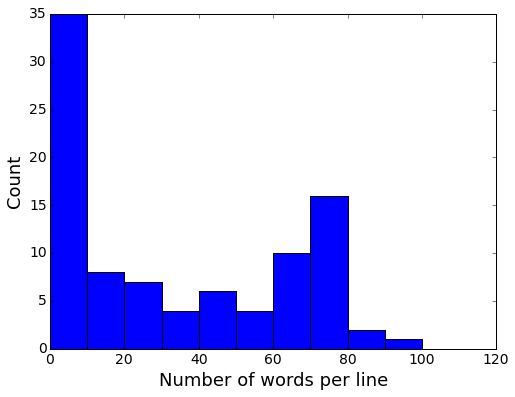

In [142]:
plt.bar(left[:-1], count, width=10)
plt.xlabel('Number of words per line')
plt.ylabel('Count')

In [143]:
# flatMap flattens the iterators returned to it
num_chars_sq = lines.flatMap(lambda line: (len(line), len(line)**2))
for item in num_chars_sq.collect():
    if (item > 7000): print item

7056
14400
14400
7056
9409


In [144]:
words = lines.flatMap(lambda line: line.split())
print len(words.collect()), len(words.distinct().collect())

440 259


In [145]:
print sorted(words.countByValue().items(), key=lambda (u, v): v, reverse=True)[:10]

[('the', 21), ('to', 14), ('Spark', 13), ('for', 11), ('and', 10), ('##', 8), ('a', 8), ('run', 7), ('can', 6), ('is', 6)]


In [146]:
# this transformation goes as the square of the number of items
cartProd = lines.cartesian(num_chars)
print cartProd.count(), cartProd.first()

9025 ('# Apache Spark', 14)


In [147]:
# all-with-all between two RDDs which can be the same
samp_cartProd = cartProd.sample(False, 0.001, seed=0)
print samp_cartProd.collect()

[('and Spark Streaming for stream processing.', 68), ('    >>> sc.parallelize(range(1000)).count()', 74), ('## Online Documentation', 29), ('More detailed documentation is available from the project site, at', 16), ('', 0)]


In [148]:
max_item = num_chars.reduce(lambda x, y: x if x > y else y)
print max_item, num_chars.max()

120 120


In [149]:
total = num_chars.reduce(lambda x, y: x + y)
print total

3264


In [150]:
total_with_fold = num_chars.fold(0, lambda x, y: x + y)
print total_with_fold

3264


In [151]:
# the first argument is the zero value for the two operations: the first being the elements on a partition
# and the second being the zero value for the combination of the results
sumCount = num_chars.aggregate((0, 0),
                               (lambda acc, value: (acc[0] + value, acc[1] + 1)),
                               (lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])))
print float(sumCount[0]) / sumCount[1]

34.3578947368


In [152]:
# foreach method does not have a return
print lines.first()
lines.foreach(lambda line: line.lower())
print lines.first()
lines = lines.map(lambda line: line.lower())
print lines.first()

# Apache Spark
# Apache Spark
# apache spark


In [153]:
num_chars.variance()

1108.0192797783932

In [155]:
# fast re-use is possible through persist with different storage levels
from pyspark import StorageLevel
lines.persist(StorageLevel.MEMORY_ONLY)
print lines.top(5)

['you can set the master environment variable when running examples to submit', 'you can find the latest spark documentation, including a programming', 'will run the pi example locally.', 'try the following command, which should return 1000:', 'to run one of them, use `./bin/run-example <class> [params]`. for example:']
